In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load your data
data = pd.read_excel('All NCs (New) Non-conformance data YTD.xlsx')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
   text = re.sub(r'\W', ' ', str(text))
   text = re.sub(r'\s+', ' ', text)
   text = text.lower()
   return text

# # Detect and translate non-English text
# def detect_and_translate(text):
#    try:
#        detected_lang = translator.detect(text).lang
#        if detected_lang != 'en':
#            translated_text = translator.translate(text, src=detected_lang, dest='en').text
#            return translated_text
#        return text
#    except Exception as e:
#        print(f"Error translating text: {text}. Error: {e}")
#        return text

# Apply cleaning and translation (you can skip translation if all text is in English)
def process_description(description):
   cleaned_text = clean_text(description)
   return cleaned_text

data['cleaned_description'] = data['NonconformanceDescription'].apply(process_description)

# Tokenization and Lemmatization
def tokenize_and_lemmatize(text):
   tokens = text.split()
   tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
   return ' '.join(tokens)

data['cleaned_description'] = data['cleaned_description'].apply(tokenize_and_lemmatize)

# Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(data['cleaned_description']).toarray()

# Assuming 'Disposition' is the target variable for classification
y = data['Disposition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashish.Madkaikar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashish.Madkaikar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


              precision    recall  f1-score   support

      REPAIR       0.96      0.79      0.86        85
      REWORK       0.79      0.84      0.81      1493
         RTV       0.87      0.85      0.86       773
       SCRAP       0.83      0.86      0.84      2369
   USE_AS_IS       0.67      0.42      0.52       484

    accuracy                           0.81      5204
   macro avg       0.82      0.75      0.78      5204
weighted avg       0.81      0.81      0.81      5204

[[  67   12    0    6    0]
 [   3 1258   18  184   30]
 [   0   20  659   89    5]
 [   0  188   72 2046   63]
 [   0  124    8  149  203]]


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk


## Most common defect

In [3]:

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import pandas as pd
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load your data
data = pd.read_excel('All NCs (New) Non-conformance data YTD.xlsx')
# Initialize lemmatizer and stopwords

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Text cleaning function
def clean_text(text):
   text = re.sub(r'\W', ' ', str(text))
   text = re.sub(r'\s+', ' ', text)
   text = text.lower()
   return text

# # Detect and translate non-English text
# def detect_and_translate(text):
#    try:
#        detected_lang = translator.detect(text).lang
#        if detected_lang != 'en':
#            translated_text = translator.translate(text, src=detected_lang, dest='en').text
#            return translated_text
#        return text
#    except Exception as e:
#        print(f"Error translating text: {text}. Error: {e}")
#        return text

# Apply cleaning and translation (you can skip translation if all text is in English)
def process_description(description):
   cleaned_text = clean_text(description)
   return cleaned_text

data['cleaned_description'] = data['NonconformanceDescription'].apply(process_description)

# Tokenization and Lemmatization
def tokenize_and_lemmatize(text):
   tokens = text.split()
   tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
   return ' '.join(tokens)

data['cleaned_description'] = data['cleaned_description'].apply(tokenize_and_lemmatize)

# Vectorization
# vectorizer = TfidfVectorizer(max_features=5000)
# X = vectorizer.fit_transform(data['cleaned_description']).toarray()
# Vectorize the text to find the frequency of terms


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ashish.Madkaikar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Ashish.Madkaikar\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
data['cleaned_description'].head(20)

0                             drill bit stuck plug stem
1                 stem pulled wrong job already drilled
2                     broke carbide drill bit stem plug
3                               thread damaged assembly
4                                 drill bit broke insde
5                              damaged durring assembly
6                                     attached bad plug
7                                     broken drill plug
8                                drill bit stuck inside
9                    drill bit broke stem cannot remove
10                           thread stem cross threaded
11                               mft error missing part
12                                               broken
13                                   spec bushing large
14                                         fit actuator
15      3 white ring supposed 4 installed remove reject
16            seat ring need recut would make leak test
17    damaged special paint landing edge yoke di

c:\Users\Ashish.Madkaikar\Anaconda3\envs\spaces\lib\site-packages\sentence_transformers\cross_encoder\CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


Generating BERT embeddings...


Batches: 100%|██████████| 814/814 [02:05<00:00,  6.50it/s]


Clustering into 20 clusters...
Performing t-SNE for visualization...


c:\Users\Ashish.Madkaikar\Anaconda3\envs\spaces\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


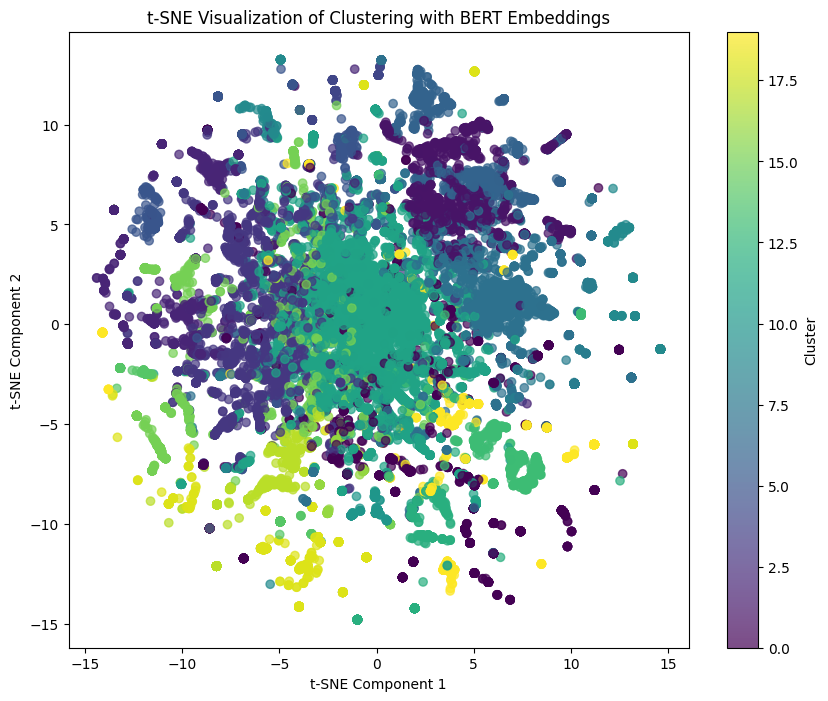


Cluster 0:
- diaphram leaked test
- failed lp testing
- failed lp testing
- failed lp testing
- cant remove stem plug need rejection

Cluster 1:
- pas class iv pas vi
- porosity yoke rejected qa
- reusiner au fil le retainer suivant le plan joint recharger le diametre ext du retainer avec 4 cordon de soudure au diametre 107 16
- rectifier le ra 0 8 du plug ressuer la cage assy si fussurée si ok reprise du diam 169 16 du cage retainer remonter et verifier si ca fuit et retour de l info à l ingeneering
- comme vu avec iwe soudure doit etre en v et le contre pièces seront en v tube déja trop court

Cluster 2:
- damage stuck stem
- bent damage
- damage teardown
- surface damage pressing bushing
- damaged installed

Cluster 3:
- drill bit stuck plug stem
- stem pulled wrong job already drilled
- broke carbide drill bit stem plug
- drill bit broke insde
- attached bad plug

Cluster 4:
- white plastic contamination
- white plastic contamination
- plastic white contamination
- plastic white c

In [4]:



# Assume the column 'NonconformanceDescription' contains the cleaned descriptions
sentences = data['cleaned_description'].tolist()


import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Generate embeddings for the sentences
print("Generating BERT embeddings...")
embeddings = model.encode(sentences, show_progress_bar=True)

# Apply K-means clustering to the embeddings
num_clusters = 10
print(f"Clustering into {num_clusters} clusters...")
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(embeddings)

# Visualize the clusters using t-SNE
print("Performing t-SNE for visualization...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('t-SNE Visualization of Clustering with BERT Embeddings')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

# Analyze clusters by printing out some sample descriptions from each cluster
for cluster_num in range(num_clusters):
    print(f"\nCluster {cluster_num}:")
    cluster_samples = data[data['Cluster'] == cluster_num]['cleaned_description'].head(5)
    for sample in cluster_samples:
        print(f"- {sample}")

In [8]:
countvectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['cleaned_description'])

# Sum the occurrences of each word across all documents
word_counts = X.sum(axis=0).A1
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts))

# Find the most common defect
most_common_defect = max(word_freq, key=word_freq.get)
print(f"Most common defect: {most_common_defect}, Frequency: {word_freq[most_common_defect]}")

Most common defect: rev, Frequency: 2680


In [9]:
word_freq

{'00': 126,
 '000': 72,
 '0000': 1,
 '0001': 1,
 '00015': 3,
 '0001aa': 1,
 '0002': 1,
 '00025': 4,
 '00028': 1,
 '0003': 3,
 '0004': 2,
 '000482873': 1,
 '000483134': 1,
 '000497127': 1,
 '0005': 3,
 '0006': 3,
 '0007': 1,
 '0008': 6,
 '0009': 2,
 '000x': 1,
 '001': 95,
 '0010': 1,
 '0011': 4,
 '0011_x000d_': 1,
 '0012': 3,
 '0013': 1,
 '0014': 1,
 '0015': 11,
 '0017': 4,
 '0018': 1,
 '0019': 1,
 '002': 109,
 '0025': 5,
 '0027': 1,
 '0028': 1,
 '0029': 1,
 '003': 78,
 '0030': 1,
 '00306': 2,
 '0033': 2,
 '0034': 1,
 '0035': 3,
 '004': 55,
 '0041': 1,
 '0045': 2,
 '0046': 1,
 '0048': 2,
 '005': 72,
 '00525': 1,
 '0055': 2,
 '006': 36,
 '0060': 1,
 '00623': 1,
 '0063': 2,
 '0065': 1,
 '0069': 2,
 '00694971': 1,
 '007': 36,
 '0070': 2,
 '0074': 1,
 '0075': 4,
 '00756': 1,
 '00758': 1,
 '008': 38,
 '0085': 1,
 '0087': 1,
 '009': 17,
 '009h': 4,
 '00unf': 1,
 '01': 36,
 '010': 79,
 '010048x041w': 1,
 '0104163514w': 1,
 '0104483539w': 1,
 '010532356bw': 1,
 '0109003513w': 1,
 '011': 22,
 '0